In [41]:
%pip install pyvinecopulib numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyvinecopulib as pvc
from scipy.stats import rankdata, t


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
t_avg = pd.read_csv('../data/t_max.csv')

city1 = t_avg['London'].values
city2 = t_avg['Paris'].values

In [43]:
u = rankdata(city1) / (len(city1) + 1)
v = rankdata(city2) / (len(city2) + 1)

UV = np.column_stack((u, v))

In [44]:
controls = pvc.FitControlsBicop(family_set = [pvc.BicopFamily.student])

copula = pvc.Bicop.from_data(UV, controls=controls)

In [45]:
display(copula)

<pyvinecopulib.Bicop>
Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.92
 6.7

In [46]:
rho = copula.parameters[0][0]
nu = copula.parameters[1][0]

display(rho, nu)

np.float64(0.9203583400813272)

np.float64(6.72665264832868)

In [47]:
def student_t_tail_dependence(rho, nu):
    quantile = -np.sqrt((nu + 1) * (1 - rho) / (1 + rho))
    tail_dependence = 2 * t.cdf(quantile, df=nu + 1)
    return tail_dependence, tail_dependence  # λ_L = λ_U in Student-t

# Example: rho = 0.934, nu = 14
lambda_L, lambda_U = student_t_tail_dependence(rho, nu)
print(f"Lower Tail Dependence (λ_L): {lambda_L:.4f}")
print(f"Upper Tail Dependence (λ_U): {lambda_U:.4f}")

Lower Tail Dependence (λ_L): 0.5874
Upper Tail Dependence (λ_U): 0.5874


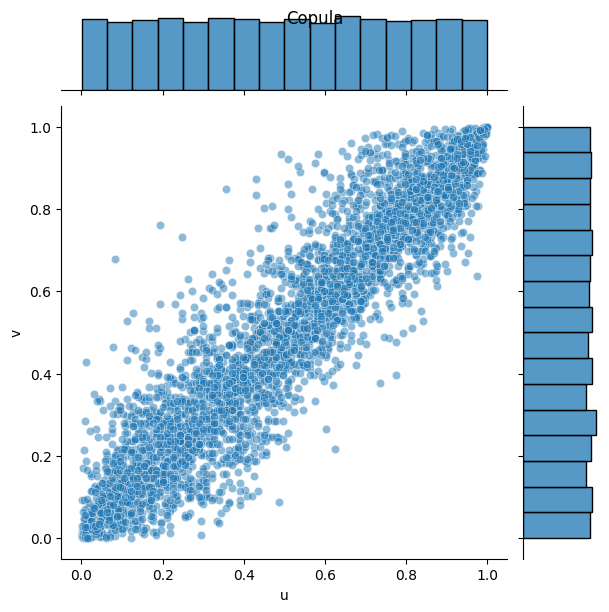

In [48]:
# Scatter plot of transformed uniform data
sns.jointplot(x=u, y=v, kind="scatter", alpha=0.5)
plt.suptitle("Copula")
plt.xlabel("u")
plt.ylabel("v")
plt.show()